# Using Predictive Analysis To Predict customer subscribing to a Term Deposit

# Part 1: Problem Statement
Subscribing to a term deposit is a significant financial decision influenced by various 
factors, such as demographics, financial status, and previous banking behavior. 
Traditional methods of customer targeting may not adequately consider the complex 
interplay between these factors, leading to inefficiencies in identifying potential 
customers. Additionally, manual, or rule-based approaches may overlook important 
patterns in the data, resulting in missed opportunities for customer engagement. 
Therefore, an efficient and data-driven approach is needed to accurately predict which 
customers are likely to subscribe to a term deposit.

## Getting Started: Load libraries and set options

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm


# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

# Use seaborn's own theme settings instead of matplotlib's style
sns.set_theme()




In [8]:
df_bank = pd.read_csv("C:\\Users\\User\\OneDrive - Sri Lanka Institute of Information Technology\\2.Campus\\Data Mining\\Project\\testing\\Predict-Term-Deposit\\deposit term dirty null (1) (2).csv")
df_bank.head()

,Id,BankId,Year,first_name,last_name,email,age,job,marital,education,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,8267790704,2023,Paul,Casey,paul.casey.1@gslingacademy.com,999.0,management,married,tertiary,...,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,1002,6712420122,2023,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,44.0,technician,single,secondary,...,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,1003,7184524312,2023,Tina,Andrews,tina.andrews.3@gslingacademy.com,33.0,entrepreneur,married,secondary,...,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,1004,2955004551,2023,Tara,Clark,tara.clark.4@gslingacademy.com,47.0,blue-collar,married,unknown,...,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,1005,9657974076,2023,Anthony,Campos,anthony.campos.5@gslingacademy.com,33.0,unknown,single,unknown,...,no,unknown,5,may,198,1,-1.0,0,unknown,no


In [70]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          45211 non-null  int64  
 1   BankId      45211 non-null  int64  
 2   Year        45211 non-null  int64  
 3   first_name  45211 non-null  object 
 4   last_name   45211 non-null  object 
 5   email       45195 non-null  object 
 6   age         45201 non-null  float64
 7   job         45203 non-null  object 
 8   marital     45211 non-null  object 
 9   education   45211 non-null  object 
 10  default     45206 non-null  object 
 11  balance     45208 non-null  float64
 12  housing     45204 non-null  object 
 13  loan        45211 non-null  object 
 14  contact     45198 non-null  object 
 15  day         45211 non-null  int64  
 16  month       45210 non-null  object 
 17  duration    45164 non-null  object 
 18  campaign    45211 non-null  int64  
 19  pdays       45207 non-nul

# Part 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## 2.1 Objectives of Data Exploration

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

    The purpose of EDA is:

1. To use summary statistics and visualizations to better understand data, find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
2. For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.
    

Next step is to explore the data. There are two approached used to examine the data using:

 1. <b>Descriptive statistics</b> is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

 2. <b>Visualization</b> is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

# 2.2 Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements.

In [29]:
#basic descriptive statistics
df_bank.describe()

,Id,BankId,Year,age,balance,day,campaign,pdays,previous
count,45211.000000,4.521100e+04,45211.0,45201.000000,45208.000000,45211.000000,45211.000000,45207.000000,45211.000000
mean,23606.000000,4.989131e+09,2023.0,40.954802,1362.346620,15.806419,2.763841,40.201473,0.580323
std,13051.435847,2.892306e+09,0.0,11.539256,3044.852387,8.322476,3.098021,100.132426,2.303441
min,1001.000000,5.691900e+04,2023.0,-1.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,12303.500000,2.473409e+09,2023.0,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,23606.000000,4.972121e+09,2023.0,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,34908.500000,7.512281e+09,2023.0,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,46211.000000,9.999937e+09,2023.0,999.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [21]:
contingency_table = pd.crosstab(df_bank['marital'], df_bank['housing'], margins=True, margins_name="Total")

contingency_table

housing,no,yes,Total
marital,,,
divorced,2300,2906,5206
married,11891,15317,27208
single,5888,6902,12790
Total,20079,25125,45204


From the Contingency Table , we see More people are into housing than saying no. The ratio is mostly distributed across the all 3 categories(divorced, married or single)

Married > Single > Divorced for housing!

In [35]:
df_bank.y.unique()

array(['no', 'yes'], dtype=object)

In [36]:
# Group by diagnosis and review the output.
diag_gr = df_bank.groupby('y', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
y,
no,39922
yes,5289


Check binary encoding from NB1 to confirm the coversion of the y categorical data into numeric, where

1. yes = 1 (Subscribed to Term Deposit)
   
2. no = 0 (Not subscribed to Term Deposit)

<b>Observations</b>
39922 observations indicating the absence of cancer cells and 5289 show absence of cancer cell. This shows how much 'yes' values is very badly low compared to 'No'

Lets confirm this, by ploting the histogram.

## 2.3 Basic Data Visualizations

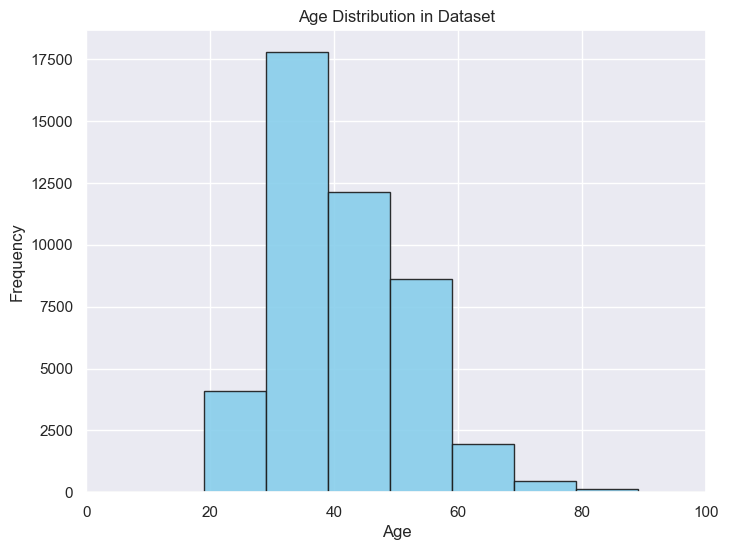

count    45201.000000
mean        40.954802
std         11.539256
min         -1.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        999.000000
Name: age, dtype: float64

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df_bank['age'], bins=100, edgecolor='k', alpha=0.9, color='skyblue')
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Dataset')
plt.show()

df_bank['age'].describe()

Note: In the above graph we see most of the people tend to be between 30 to 40 age group! The graph is Left Skewed too!

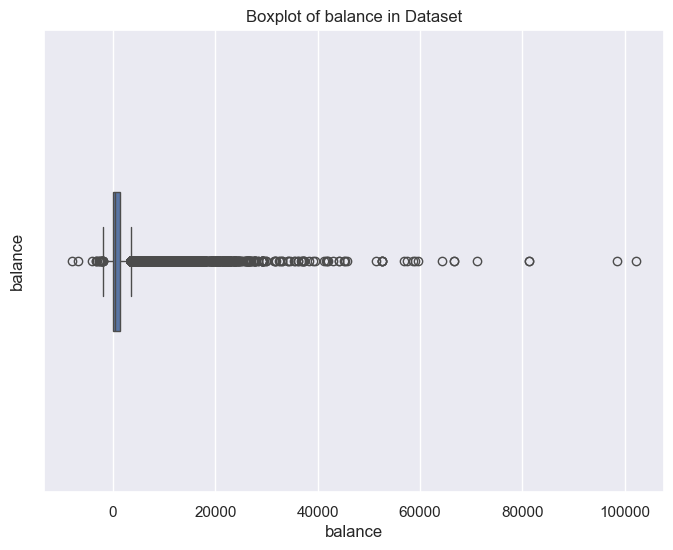

In [13]:
# Create a boxplot for the 'Age' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='balance', data=df_bank, orient='v', width=0.3)
plt.title('Boxplot of balance in Dataset')
plt.ylabel('balance')
plt.show()

 This Boxplot shows how skewed the data is and how the variance pretty low. It has many outliers to it!

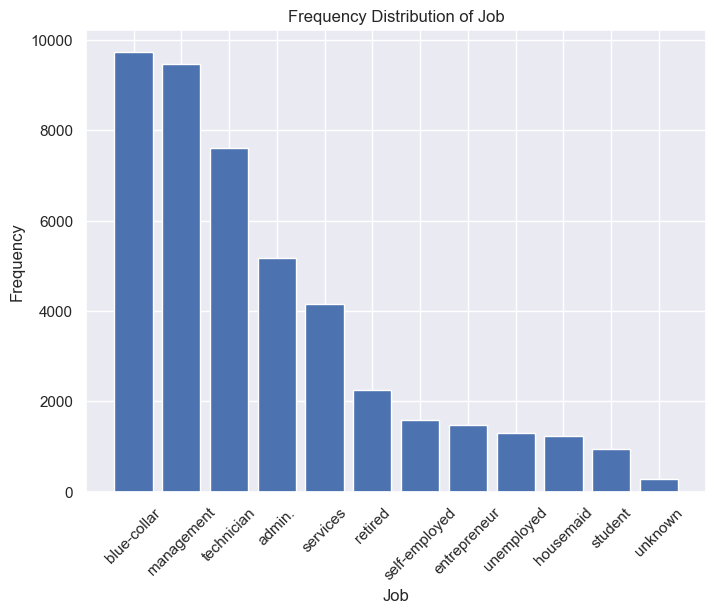

In [16]:
category_counts = df_bank['job'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Job')
plt.xticks(rotation=45)
plt.show()

From the above Frequency Distribution, we see most of the folks are into blue-collar or Management type of jobs

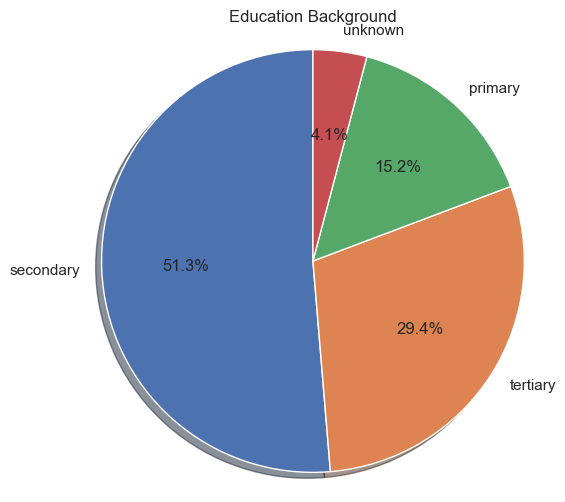

In [18]:
class_counts = df_bank['education'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Education Background')
plt.axis('equal') 
plt.show()

Thus from the Pie Chart above, most of the customers have Secondary Education which is a good sigh that they can learn more!

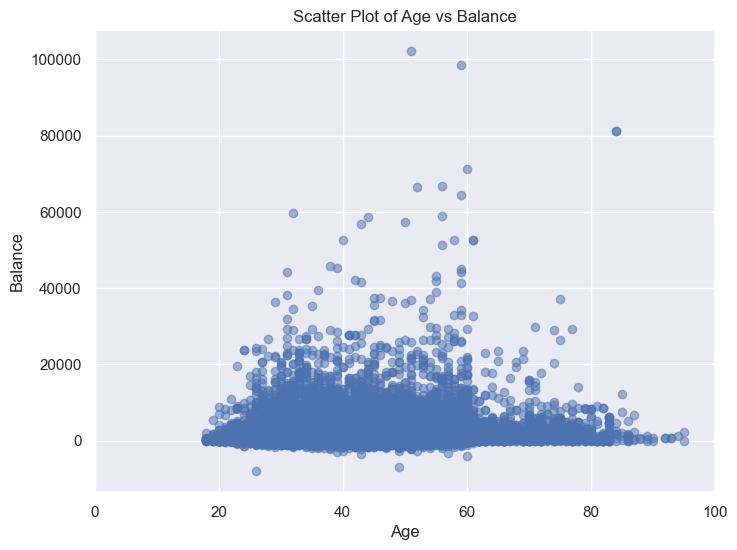

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df_bank['age'], df_bank['balance'], alpha=0.5)
plt.xlim(0, 100)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


From the Bivariate Numeric vs numeric comparison above it is visible that,in the scatter plot:

1.There is no data instance below 18.

2.The highest balance is of a person in 50s

3.Age and Balance are not proportional and highly differ!

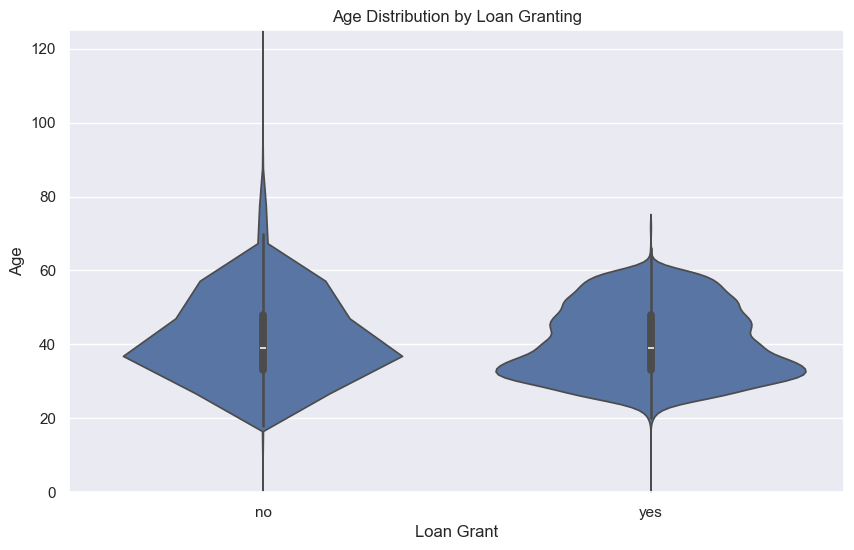

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan', y='age', data=df_bank)
plt.ylim(0, 125)
plt.xlabel('Loan Grant')
plt.ylabel('Age')
plt.title('Age Distribution by Loan Granting')
plt.show()

From the Numeric vs Categorical Plot (Violin Plot) above, we see:

1.The age distribution is more or less same! 

2.We learn from the graph that the No has more outliers compared to Yes

3.There Mean is same and there Q1 and Q2 is same as we can see from the diagram which is intersting!

4.This shows that the company is maintianing a good authority in sanctioning the loans!

## 2.4 Unimodal Data Visualizations
One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.
<ul>
<li>Histograms. </li>
<li>Density Plots. </li>
<li>Box and Whisker Plots. </li
</ul>

<Axes: xlabel='count', ylabel='y'>

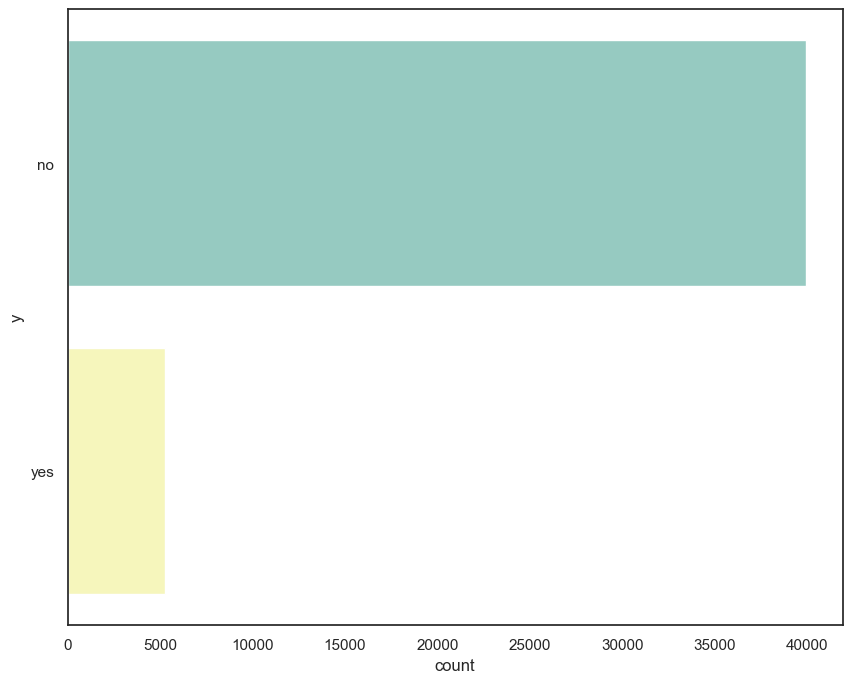

In [39]:

#lets get the frequency of Term deposits
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df_bank['y'],label='Count',palette="Set3")

In [22]:
df = pd.read_csv("C:\\Users\\User\\OneDrive - Sri Lanka Institute of Information Technology\\2.Campus\\Data Mining\\Project\\testing\\Predict-Term-Deposit\\deposit term dirty null (1) (2).csv")
df.head()

,Id,BankId,Year,first_name,last_name,email,age,job,marital,education,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,8267790704,2023,Paul,Casey,paul.casey.1@gslingacademy.com,999.0,management,married,tertiary,...,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,1002,6712420122,2023,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,44.0,technician,single,secondary,...,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,1003,7184524312,2023,Tina,Andrews,tina.andrews.3@gslingacademy.com,33.0,entrepreneur,married,secondary,...,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,1004,2955004551,2023,Tara,Clark,tara.clark.4@gslingacademy.com,47.0,blue-collar,married,unknown,...,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,1005,9657974076,2023,Anthony,Campos,anthony.campos.5@gslingacademy.com,33.0,unknown,single,unknown,...,no,unknown,5,may,198,1,-1.0,0,unknown,no


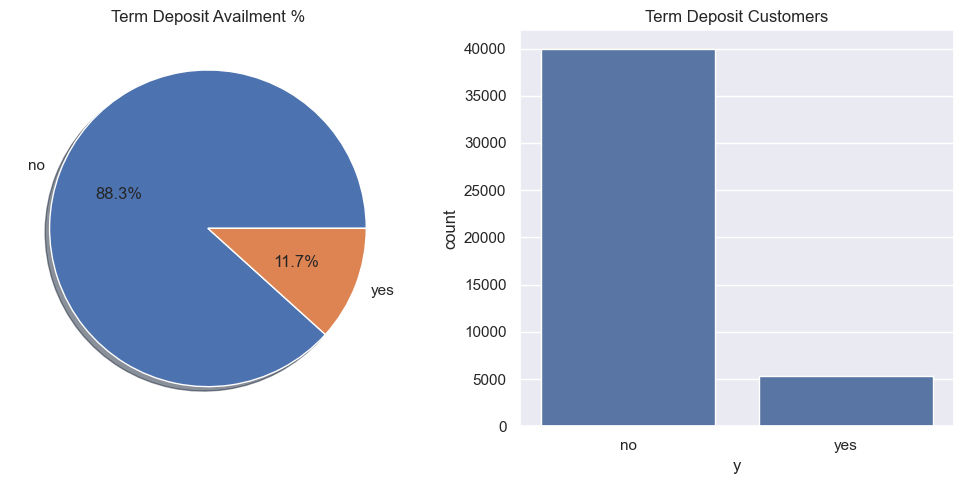

In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define the figure size
plt.figure(figsize=(10, 5))

# First subplot: Pie chart
plt.subplot(1, 2, 1)
label = df.y.value_counts().index
label_count = df.y.value_counts().values
plt.pie(label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)  # Removed 'df' argument
plt.title('Term Deposit Availment %')

# Second subplot: Countplot
plt.subplot(1, 2, 2)
sb.countplot(x='y', data=df)  # Changed 'df' to 'data'
plt.title('Term Deposit Customers')

# Display the plots
plt.tight_layout()
plt.show()


### 2.4.1 Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

#### Separate columns into smaller dataframes to perform visualization

In [46]:

#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df_bank.loc[:,["Id","y"]]
df_diag=df_bank.loc[:,["y"]]


print(df_id_diag.columns)


Index(['Id', 'y'], dtype='object')


In [42]:
#### Histogram 

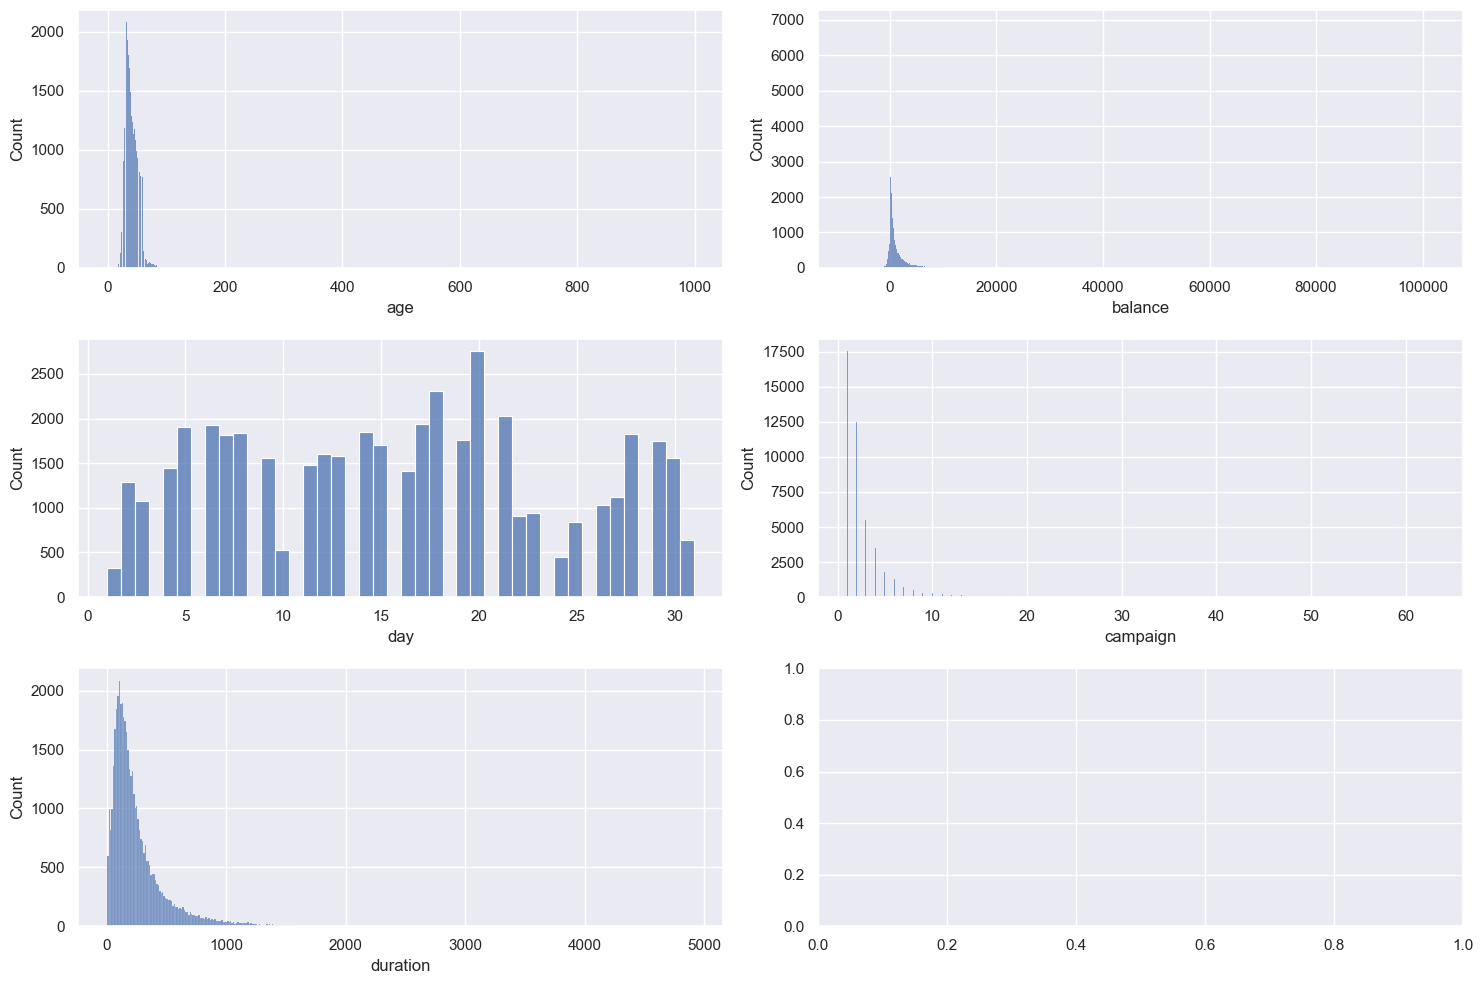

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 3 columns
sns.histplot(data=df_bank, x='age', ax=axes[0, 0])
sns.histplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.histplot(data=df_bank, x='day', ax=axes[1, 0])
sns.histplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.histplot(data=df_bank, x='duration', ax=axes[2,0])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


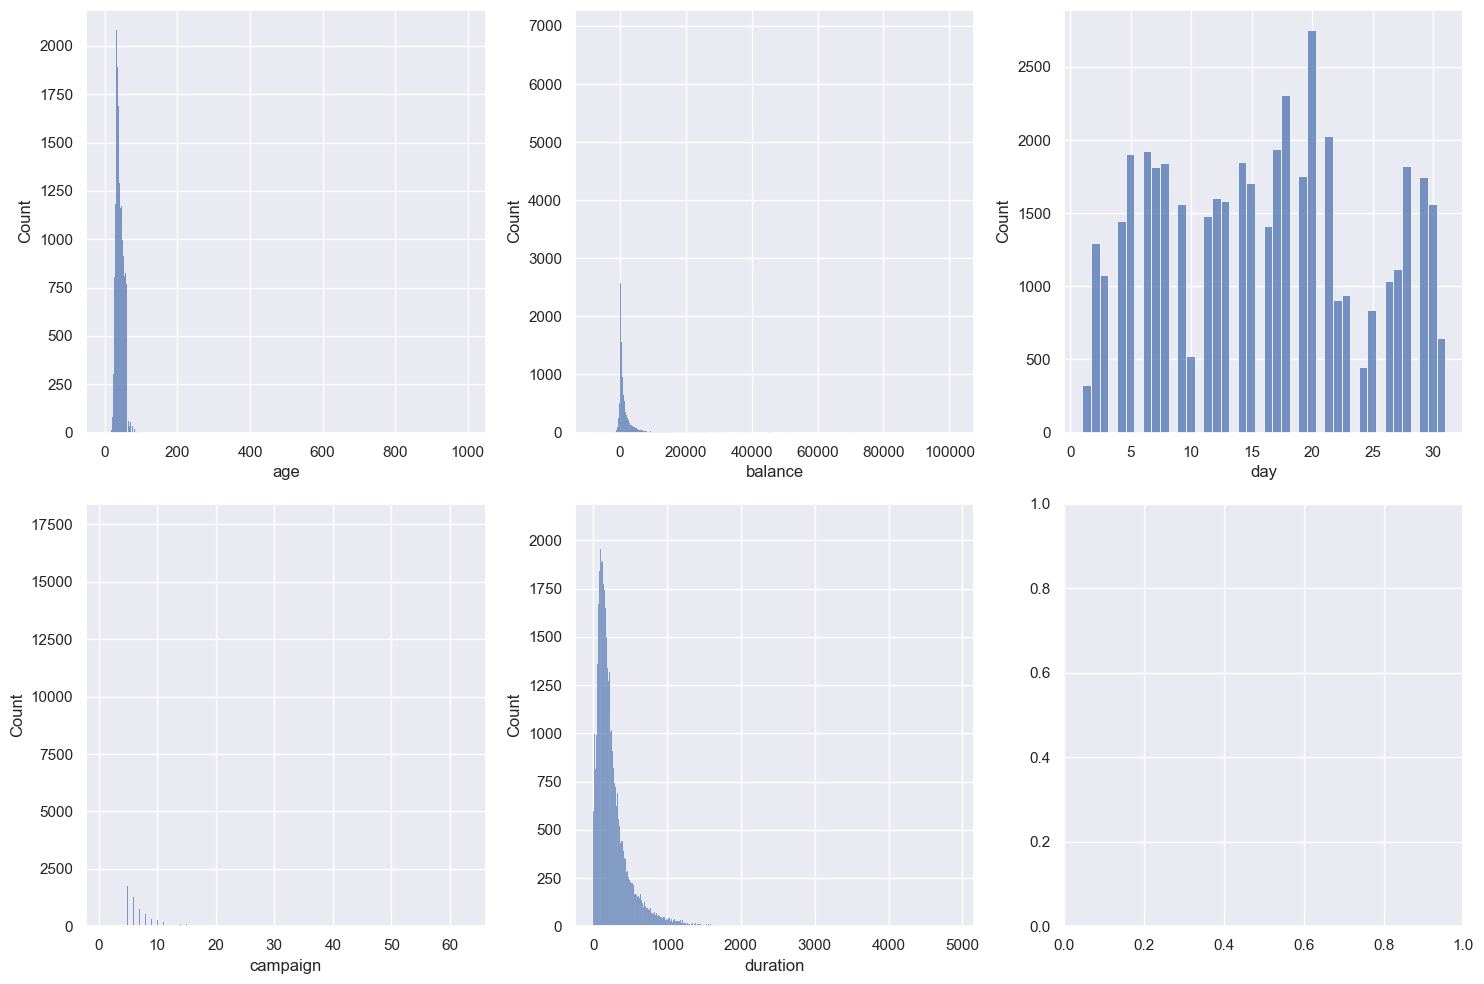

In [56]:
from pylab import *
import seaborn as sns
import numpy as np

# Set figure size and random seed
sns.set(rc={"figure.figsize": (15, 10)})
np.random.seed(0)

# Create a 2x3 grid for 6 subplots
fig, axes = plt.subplots(2, 3)  # 2 rows, 3 columns

# Plotting in an organized manner
sns.histplot(df_bank['age'], ax=axes[0, 0])        
sns.histplot(df_bank['balance'], ax=axes[0, 1])    
sns.histplot(df_bank['day'], ax=axes[0, 2])        
sns.histplot(df_bank['campaign'], ax=axes[1, 0])   
sns.histplot(df_bank['duration'], ax=axes[1, 1])   
  

# Adjust layout
plt.tight_layout()
plt.show()


### 2.4.2 Visualize distribution of data via density plots

#### Density plots 

<Axes: xlabel='campaign', ylabel='Density'>

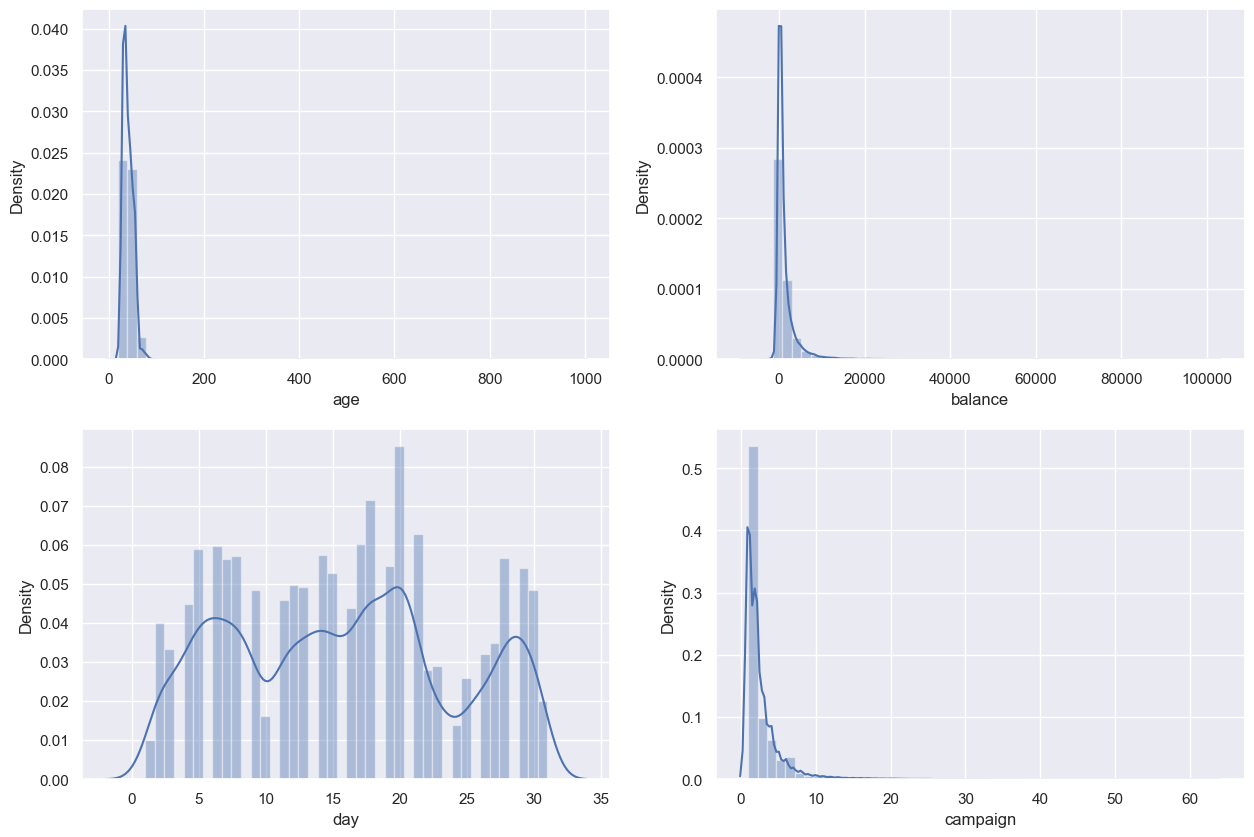

In [58]:
from pylab import *
sns.set(rc={"figure.figsize": (15,10)}); np.random.seed(0)
subplot(2,2,1)
sns.distplot(df_bank['age'])
subplot(2,2,2)
sns.distplot(df_bank['balance'])
subplot(2,2,3)
sns.distplot(df_bank['day'])
subplot(2,2,4)
sns.distplot(df_bank['campaign'])


### 2.4.3 Visualise distribution of data via box plots

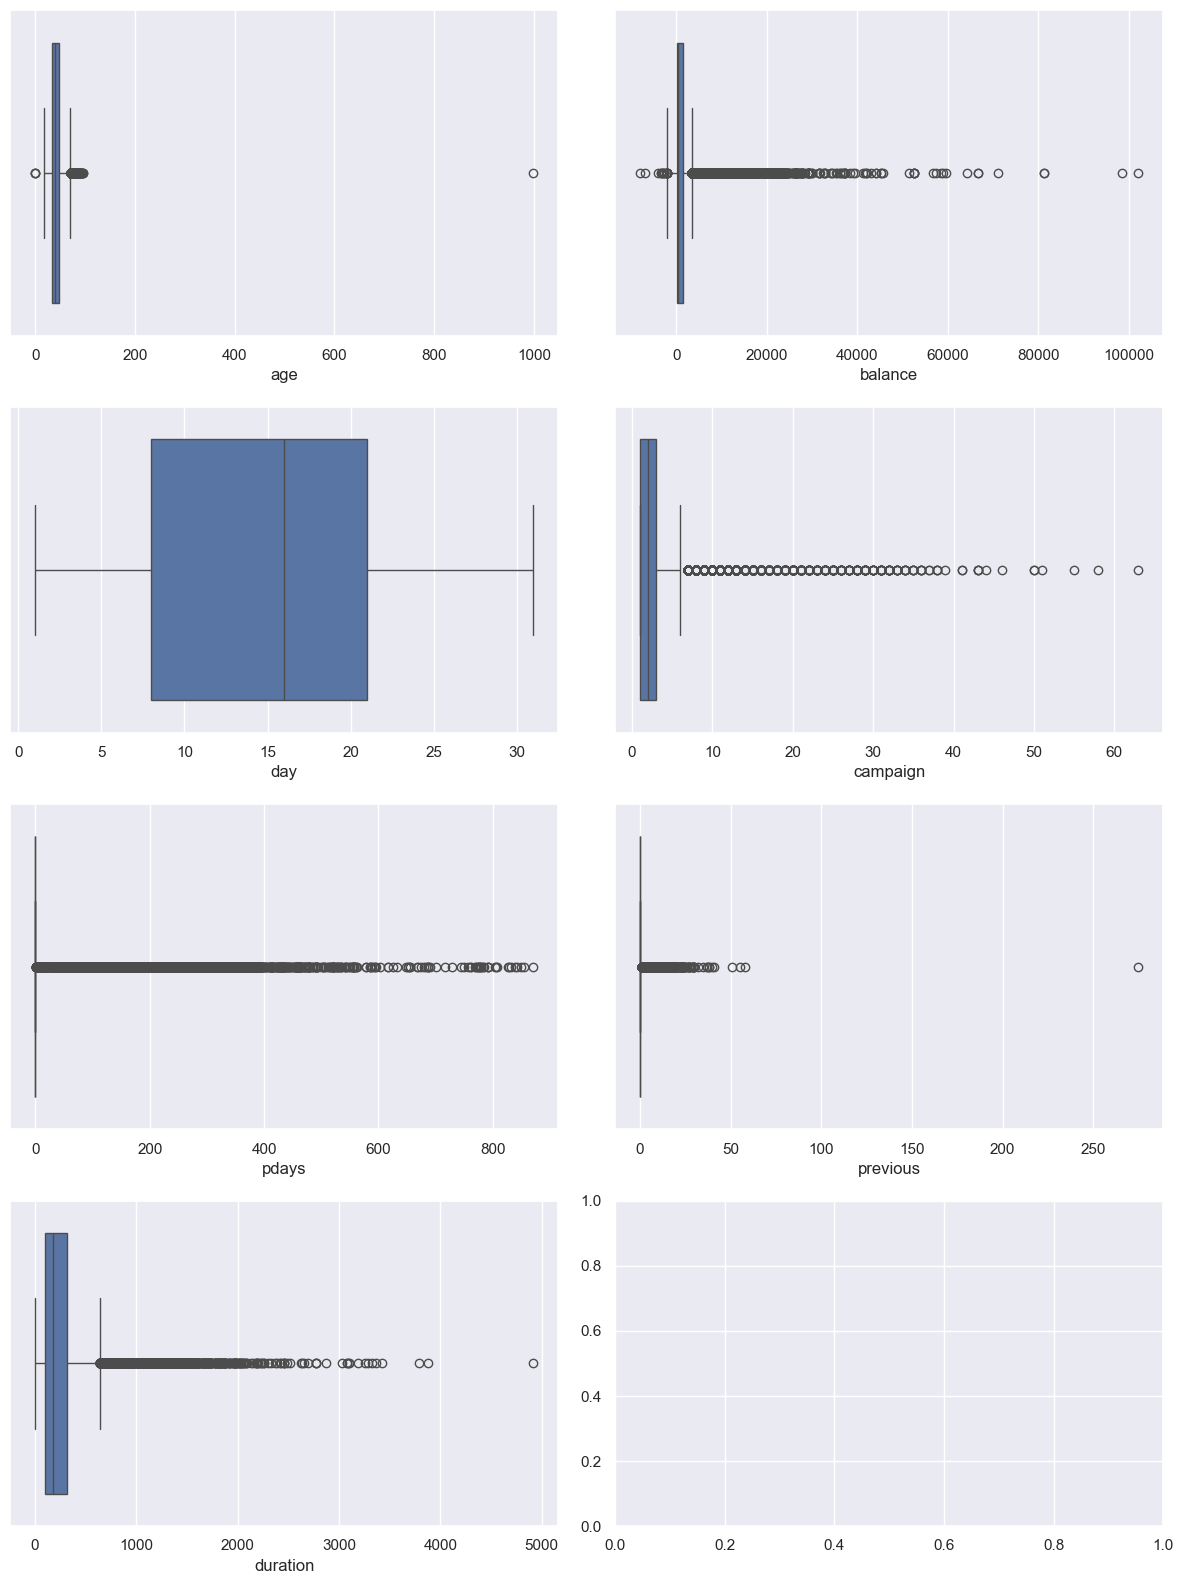

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  




plt.tight_layout()
plt.show()


### 2.5 Multimodal Data Visualizations

1. Scatter plots

2. Correlation matrix

#### Correlation matrix

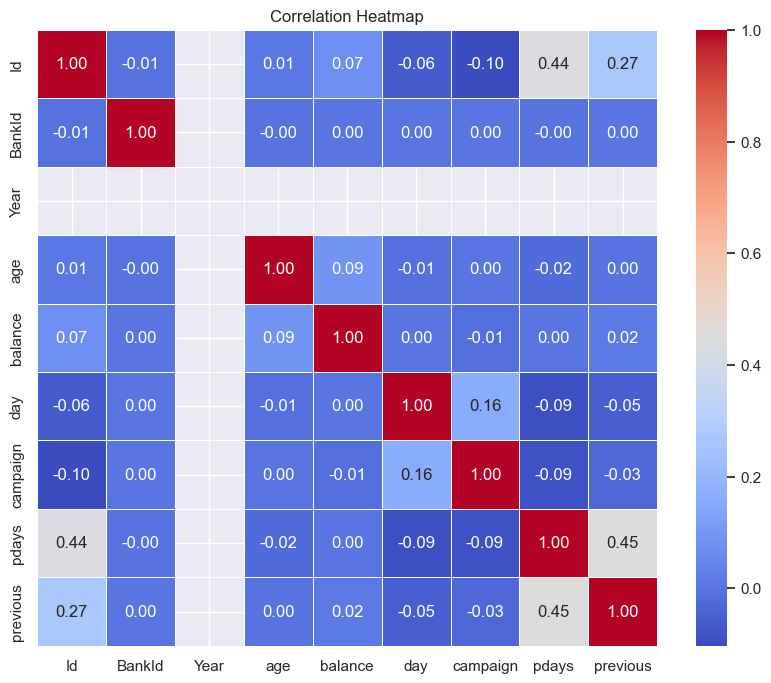

In [23]:
num_com = df_bank.select_dtypes(include=['int64','float64'])
correlation_matrix = num_com.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the above Correlation we see: There is a good positive correlation with pdays and previous.

## Conclusions

1. This is classification data and the information provided is to understand which person did deposit and what was teh duration and was the deposit fruitful or not

2. We also show that people are into quick transaction or long term places

3. Housing is taken by Married > Single > Divorsed

4. Data is uniformwly distribued for yes and no cateogry for Loans, thus Balanced Dataset!

5. There are a lot of Outliers when it comes to Balance as the data is highly left skewed

6. Age and Balance are not proportional
    
7. Most one the customers are in the age group of 30-40 Bucket!

# Pre-Processing the data

#### Introduction
Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.The pre-processing Activities involved in our project are :

1. Remvoing irrelevant Columns
2. Handling missing values
3. Checking for duplicates and invalid data in the column cand correcting them.
5. Handling Outliers
5. Assigning numerical values to categorical data
6. Dimension Reduction
7. Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).
   
In Part_2, we explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. we identified some features of interest. In this notebook I use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

### 3.1 Removing Irrelevant Column

In [12]:
df_bank = df_bank.drop(['Id', 'BankId', 'Year', 'first_name', 'last_name', 'email'], axis=1, errors='ignore')
df_bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,NaN,yes,unknown,5,may,76,1,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1.0,0,unknown,no


### 3.2 Handling duplicates and invalid data in columns

#### 3.1.1 Non-numeric characters in numeric Columns

In [5]:
# List of numeric columns to check
numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'duration']

# Loop through each numeric column and check for non-numeric values
for col in numeric_columns:
    # Identify non-numeric values excluding nulls
    non_numeric_mask = pd.to_numeric(df_bank[col], errors='coerce').isna() & df_bank[col].notna()
    
    # Print rows with non-numeric values
    if non_numeric_mask.any():
        print(f"Non-numeric values found in column '{col}':")
        print(df_bank[non_numeric_mask][col])  # Show only the problematic column
        print()

Non-numeric values found in column 'duration':
34305    \
Name: duration, dtype: object



there is one non-numeric character mistakenly entered in the duration column, let's remove it

In [6]:
# Remove the rows with non-numeric values
df_bank = df_bank[~non_numeric_mask]   

#### 3.1.2 Invalid characters in categorical columns

In [14]:
#checking for outliers in categorical variable
# Check unique values for each categorical column
for job in df_bank.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {job}:")
    print(df_bank[job].unique(), "\n")

Unique values in job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' nan 'self-employed' 'unemployed'
 'housemaid' 'student'] 

Unique values in marital:
['married' 'single' 'divorced'] 

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary'] 

Unique values in default:
['no' nan 'yes'] 

Unique values in housing:
['yes' nan 'no'] 

Unique values in loan:
['no' 'yes'] 

Unique values in contact:
['unknown' nan 'cellular' 'telephone'] 

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'
 nan] 

Unique values in poutcome:
['unknown' 'failure' 'other' 'success'] 

Unique values in y:
['no' 'yes'] 



It seems that there is no  irrelevant data entered into the columns except suome nulll values(we will process them in the next step)

#### 3.1.3 Irrelevant negative values in the columns


In [11]:
# Select only numeric columns
numeric_cols = df_bank.select_dtypes(include=[np.number]).columns

# Loop through the numeric columns and check for negative values
for col in numeric_cols:
    negative_values = df_bank[df_bank[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column {col}:")
        print(negative_values[[col]], "\n")

Negative values found in column age:
       age
45203 -1.0
45204 -1.0
45205 -1.0 

Negative values found in column balance:
       balance
25      -372.0
28      -246.0
36        -7.0
37        -3.0
45      -171.0
...        ...
44626   -205.0
44629    -46.0
44836   -195.0
44908   -130.0
44964    -42.0

[3766 rows x 1 columns] 

Negative values found in column pdays:
       pdays
0       -1.0
1       -1.0
3       -1.0
4       -1.0
5       -1.0
...      ...
45203   -1.0
45205   -1.0
45206   -1.0
45207   -1.0
45209   -1.0

[36949 rows x 1 columns] 



we don't need to handle negative values in pdays since it indicates no call on the campaign day , but we can handle negative values of Age and Balance

In [12]:
mean_balance = df_bank[df_bank['balance'] >= 0]['balance'].mean()
df_bank['balance'] = df_bank['balance'].apply(lambda x: mean_balance if x < 0 else x)

mean_balance = df_bank[df_bank['age'] >= 0]['age'].mean()
df_bank['age'] = df_bank['age'].apply(lambda x: mean_balance if x < 0 else x)


#### 3.1.4 Remove duplicate records (might have typed mistakenly with same ID)

In [19]:
# To check duplicated values 
print(df_bank.duplicated().value_counts()) 
print(df_bank.duplicated().sum())

False    45178
Name: count, dtype: int64
0


There are no duplicate Rows

### 3.2 Handling Null values

In [14]:
# We need to check missing values in dataset
df_bank.isnull().sum()

age          10
job           8
marital       0
education     0
default       5
balance       3
housing       7
loan          0
contact      13
day           0
month         1
duration     47
campaign      0
pdays         4
previous      0
poutcome      0
y             0
dtype: int64

the above depicts that some features are containing null values. 
To handle them:

1. Remove the rows (if less no.of nulls are present in a feature)
2. Use mean or median attribute calculation to fill the values.

In [16]:
#Removing Rows for columns containing less nulls
df_bank.dropna(subset=['housing', 'default',  'month', 'contact', 'job'], inplace=True)

In [10]:

# Filling using median value
df_bank['age'] = df_bank['age'].fillna(df_bank['age'].median())   
df_bank['balance'] = df_bank['balance'].fillna(df_bank['balance'].median()) 
df_bank['duration'] = df_bank['duration'].fillna(df_bank['duration'].median())
df_bank['pdays'] = df_bank['pdays'].fillna(df_bank['pdays'].median()) 



In [17]:
# We need to check missing values in dataset
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Now all nulls are cleared !!

 ###  3.3 Adjusting Outliers

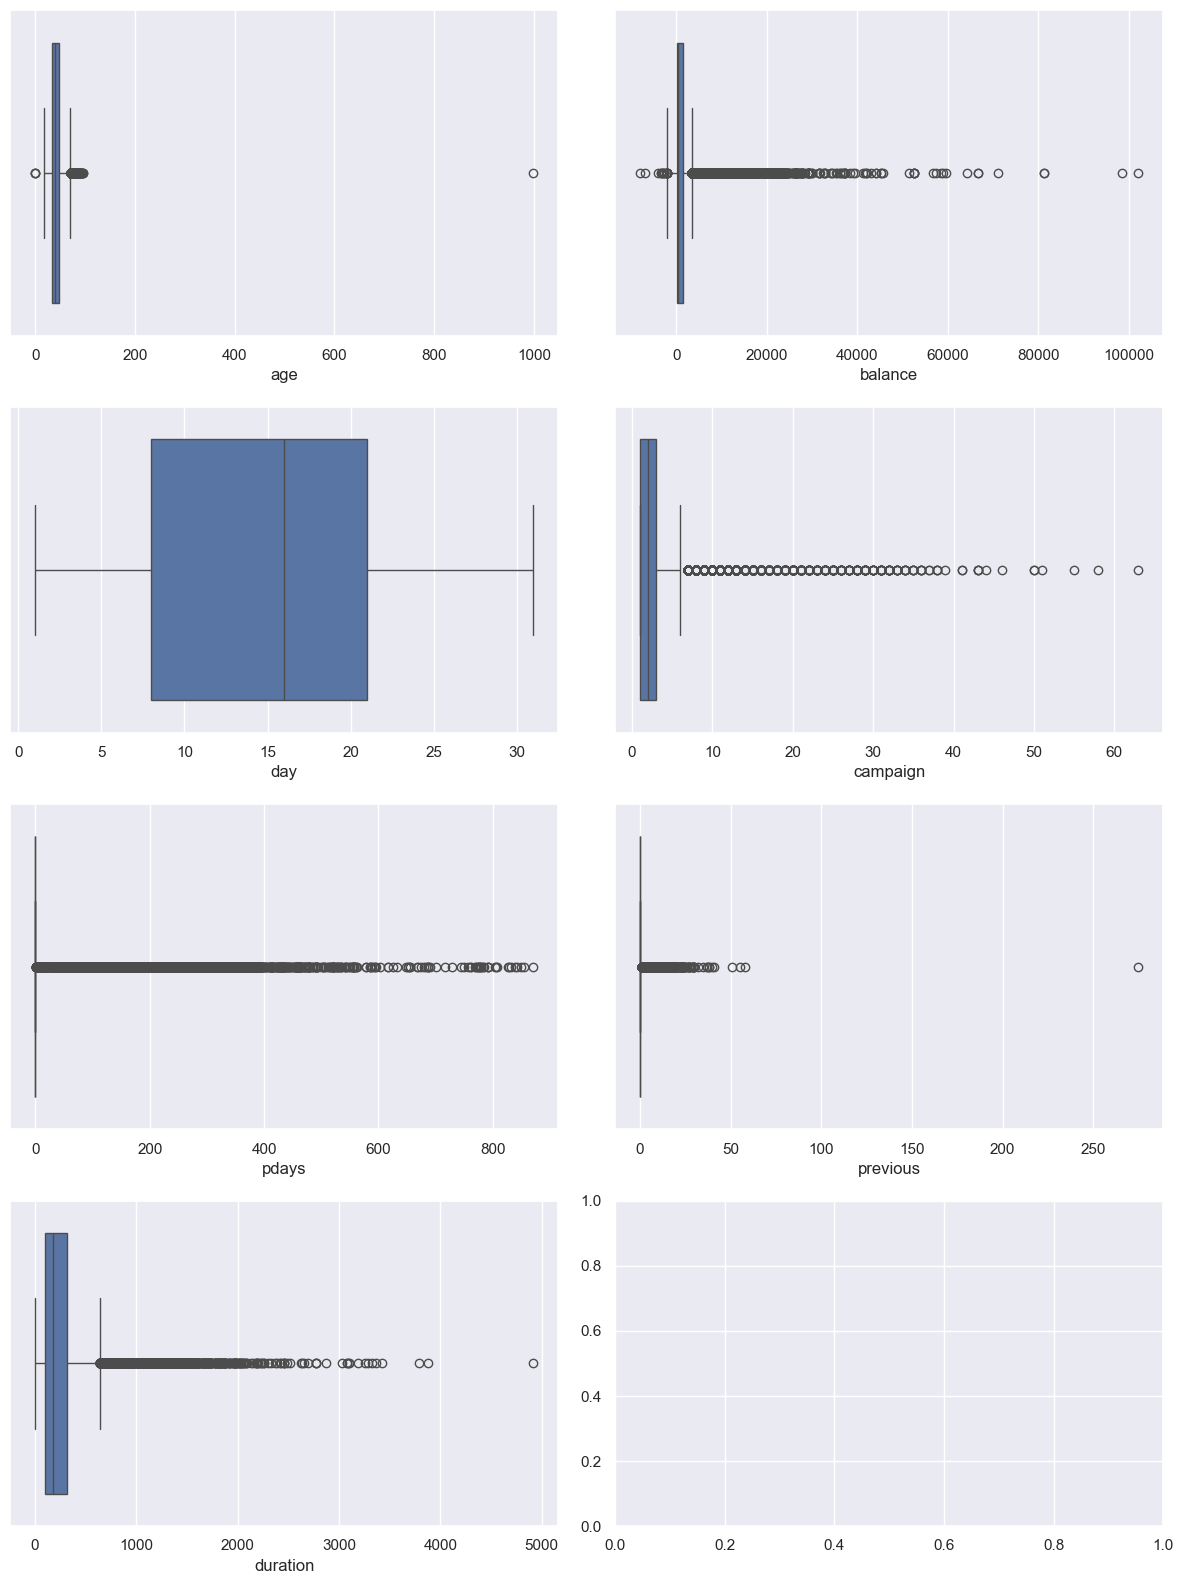

In [60]:
 import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  # Adjust to [2, 1] for third row, second column



# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
def cap_outliers(df_bank, column):
    Q1 = df_bank[column].quantile(0.25)
    Q3 = df_bank[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_bank[column] = df_bank[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df_bank

# Example usage
df_bank = cap_outliers(df_bank, 'age')
df_bank = cap_outliers(df_bank, 'balance')
df_bank = cap_outliers(df_bank, 'day')
df_bank = cap_outliers(df_bank, 'campaign')
df_bank = cap_outliers(df_bank, 'duration')
# Repeat for other columns as needed


In [62]:
df_bank = df_bank.drop(['pdays','previous'], axis=1)

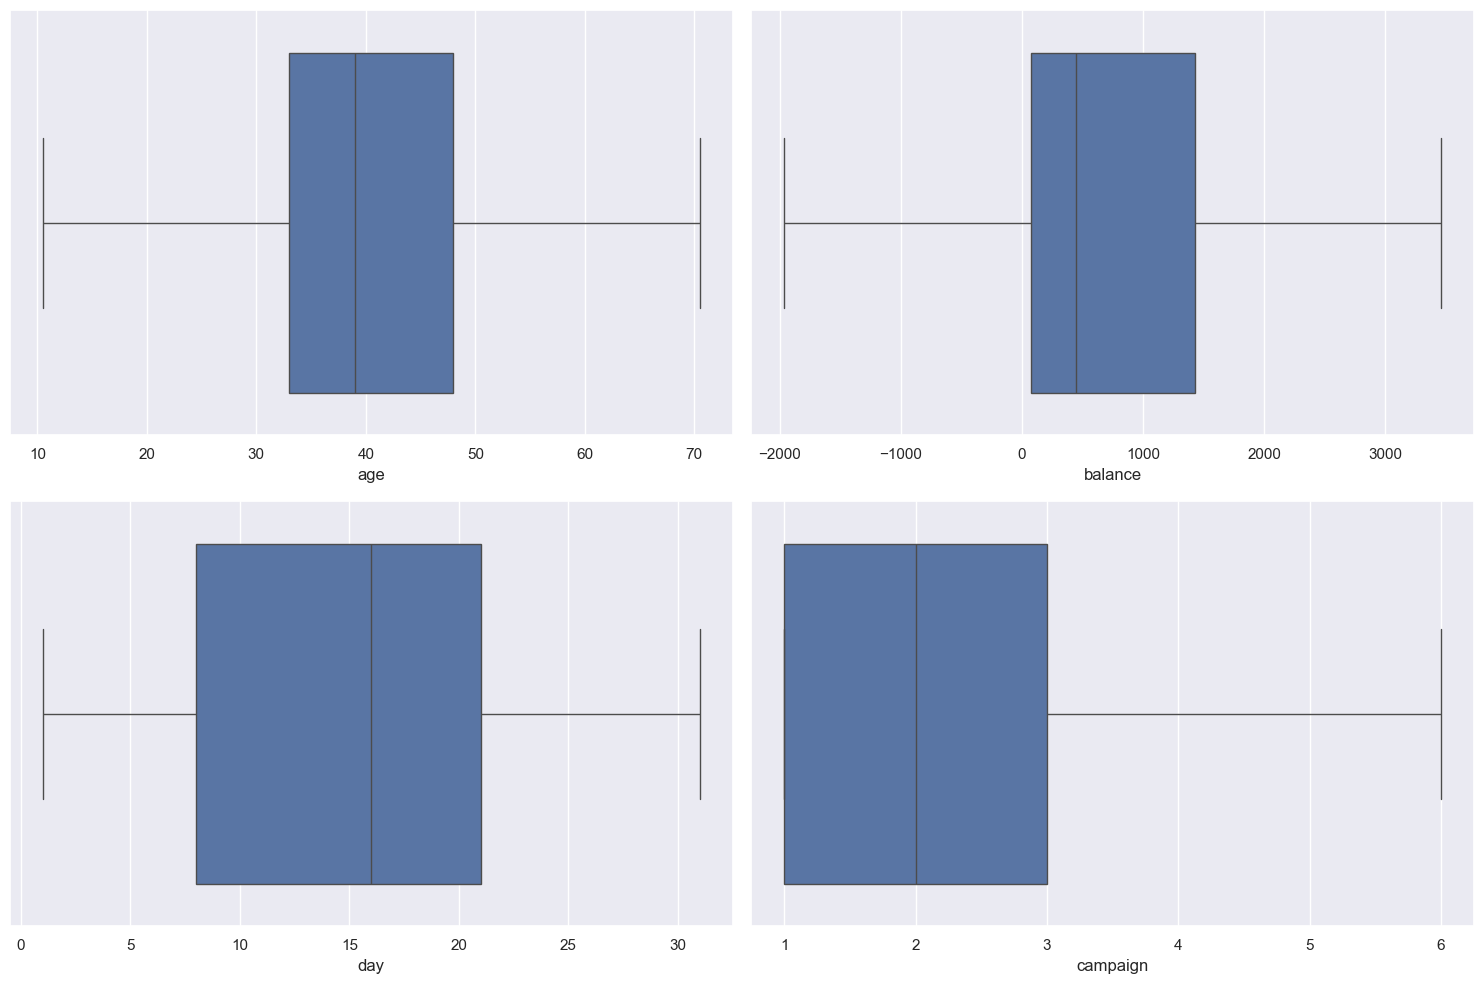

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [64]:
df_bank.describe()

,age,balance,day,duration,campaign
count,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000
mean,40.868985,933.595791,15.809199,234.974235,2.392492
std,10.396929,1176.568870,8.319956,176.762149,1.600147
min,10.500000,-1961.625000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1427.750000,21.000000,319.000000,3.000000
max,70.500000,3461.375000,31.000000,643.000000,6.000000


#### Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. 
Here I will

<ul>
<li>Split the available data into a training set and a testing set. (80% training, 20% test)
<li>Train the algorithm on the first part,
<li>make predictions on the second part and
<li>evaluate the predictions against the expected results.
</ul>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
# Feature-target split
X = df_bank.drop('y', axis=1)
y = df_bank['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3.4 Label Encoding & Feature Standardization

As seen in Part_2 the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

In [30]:
# 1. Data Standardization and Encoding
def preprocess_data(X, categorical_features, numerical_features):
    # One-hot encoding for categorical features and scaling numerical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )
    return preprocessor


In [31]:
# Example usage of preprocess_data function
categorical_features = [col for col in X.columns if X[col].dtype == 'object']  # Automatically get categorical features
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]  # Automatically get numerical features

# Apply preprocessing
preprocessor = preprocess_data(X, categorical_features, numerical_features)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Traning Models

# 1. SVC Model

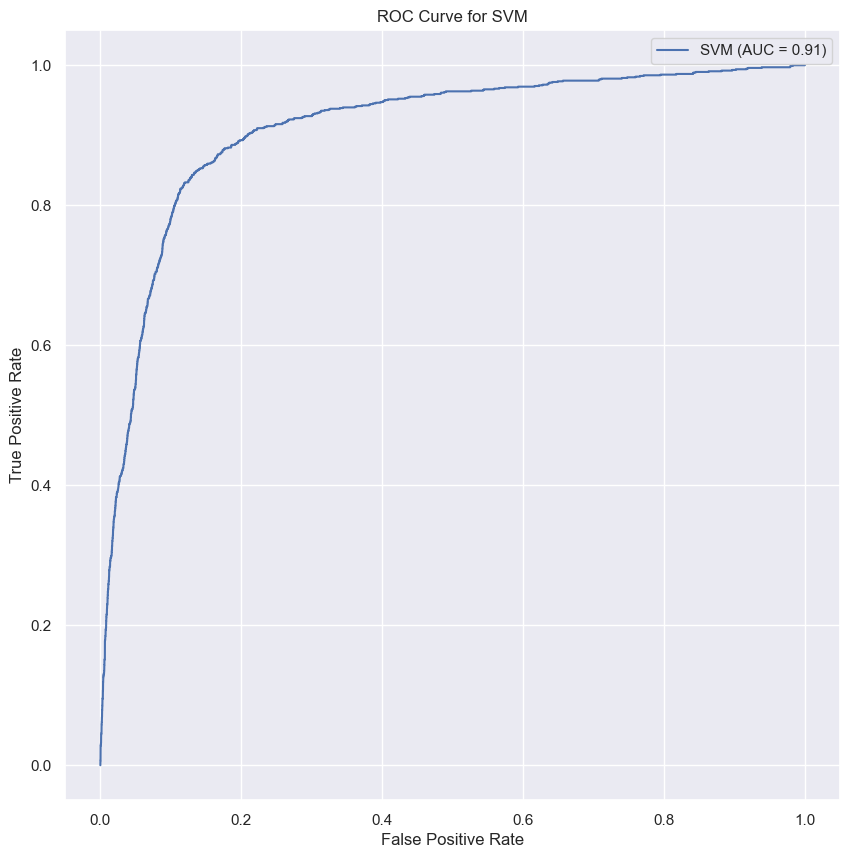

Accuracy: 0.91

Confusion Matrix:
[[7813  177]
 [ 646  400]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7990
           1       0.69      0.38      0.49      1046

    accuracy                           0.91      9036
   macro avg       0.81      0.68      0.72      9036
weighted avg       0.90      0.91      0.90      9036

F1 Score: 0.49
Precision: 0.69
Recall: 0.38


In [37]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the Support Vector Machine classifier
svm_model = SVC(probability=True, random_state=42)  # Set probability=True to enable probability estimates

# Fit the model on the training data
svm_model.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = svm_model.predict_proba(X_test_preprocessed)[:, 1]  # Probability for class 1

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = svm_model.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


# 2. Decesion Tree Classifier

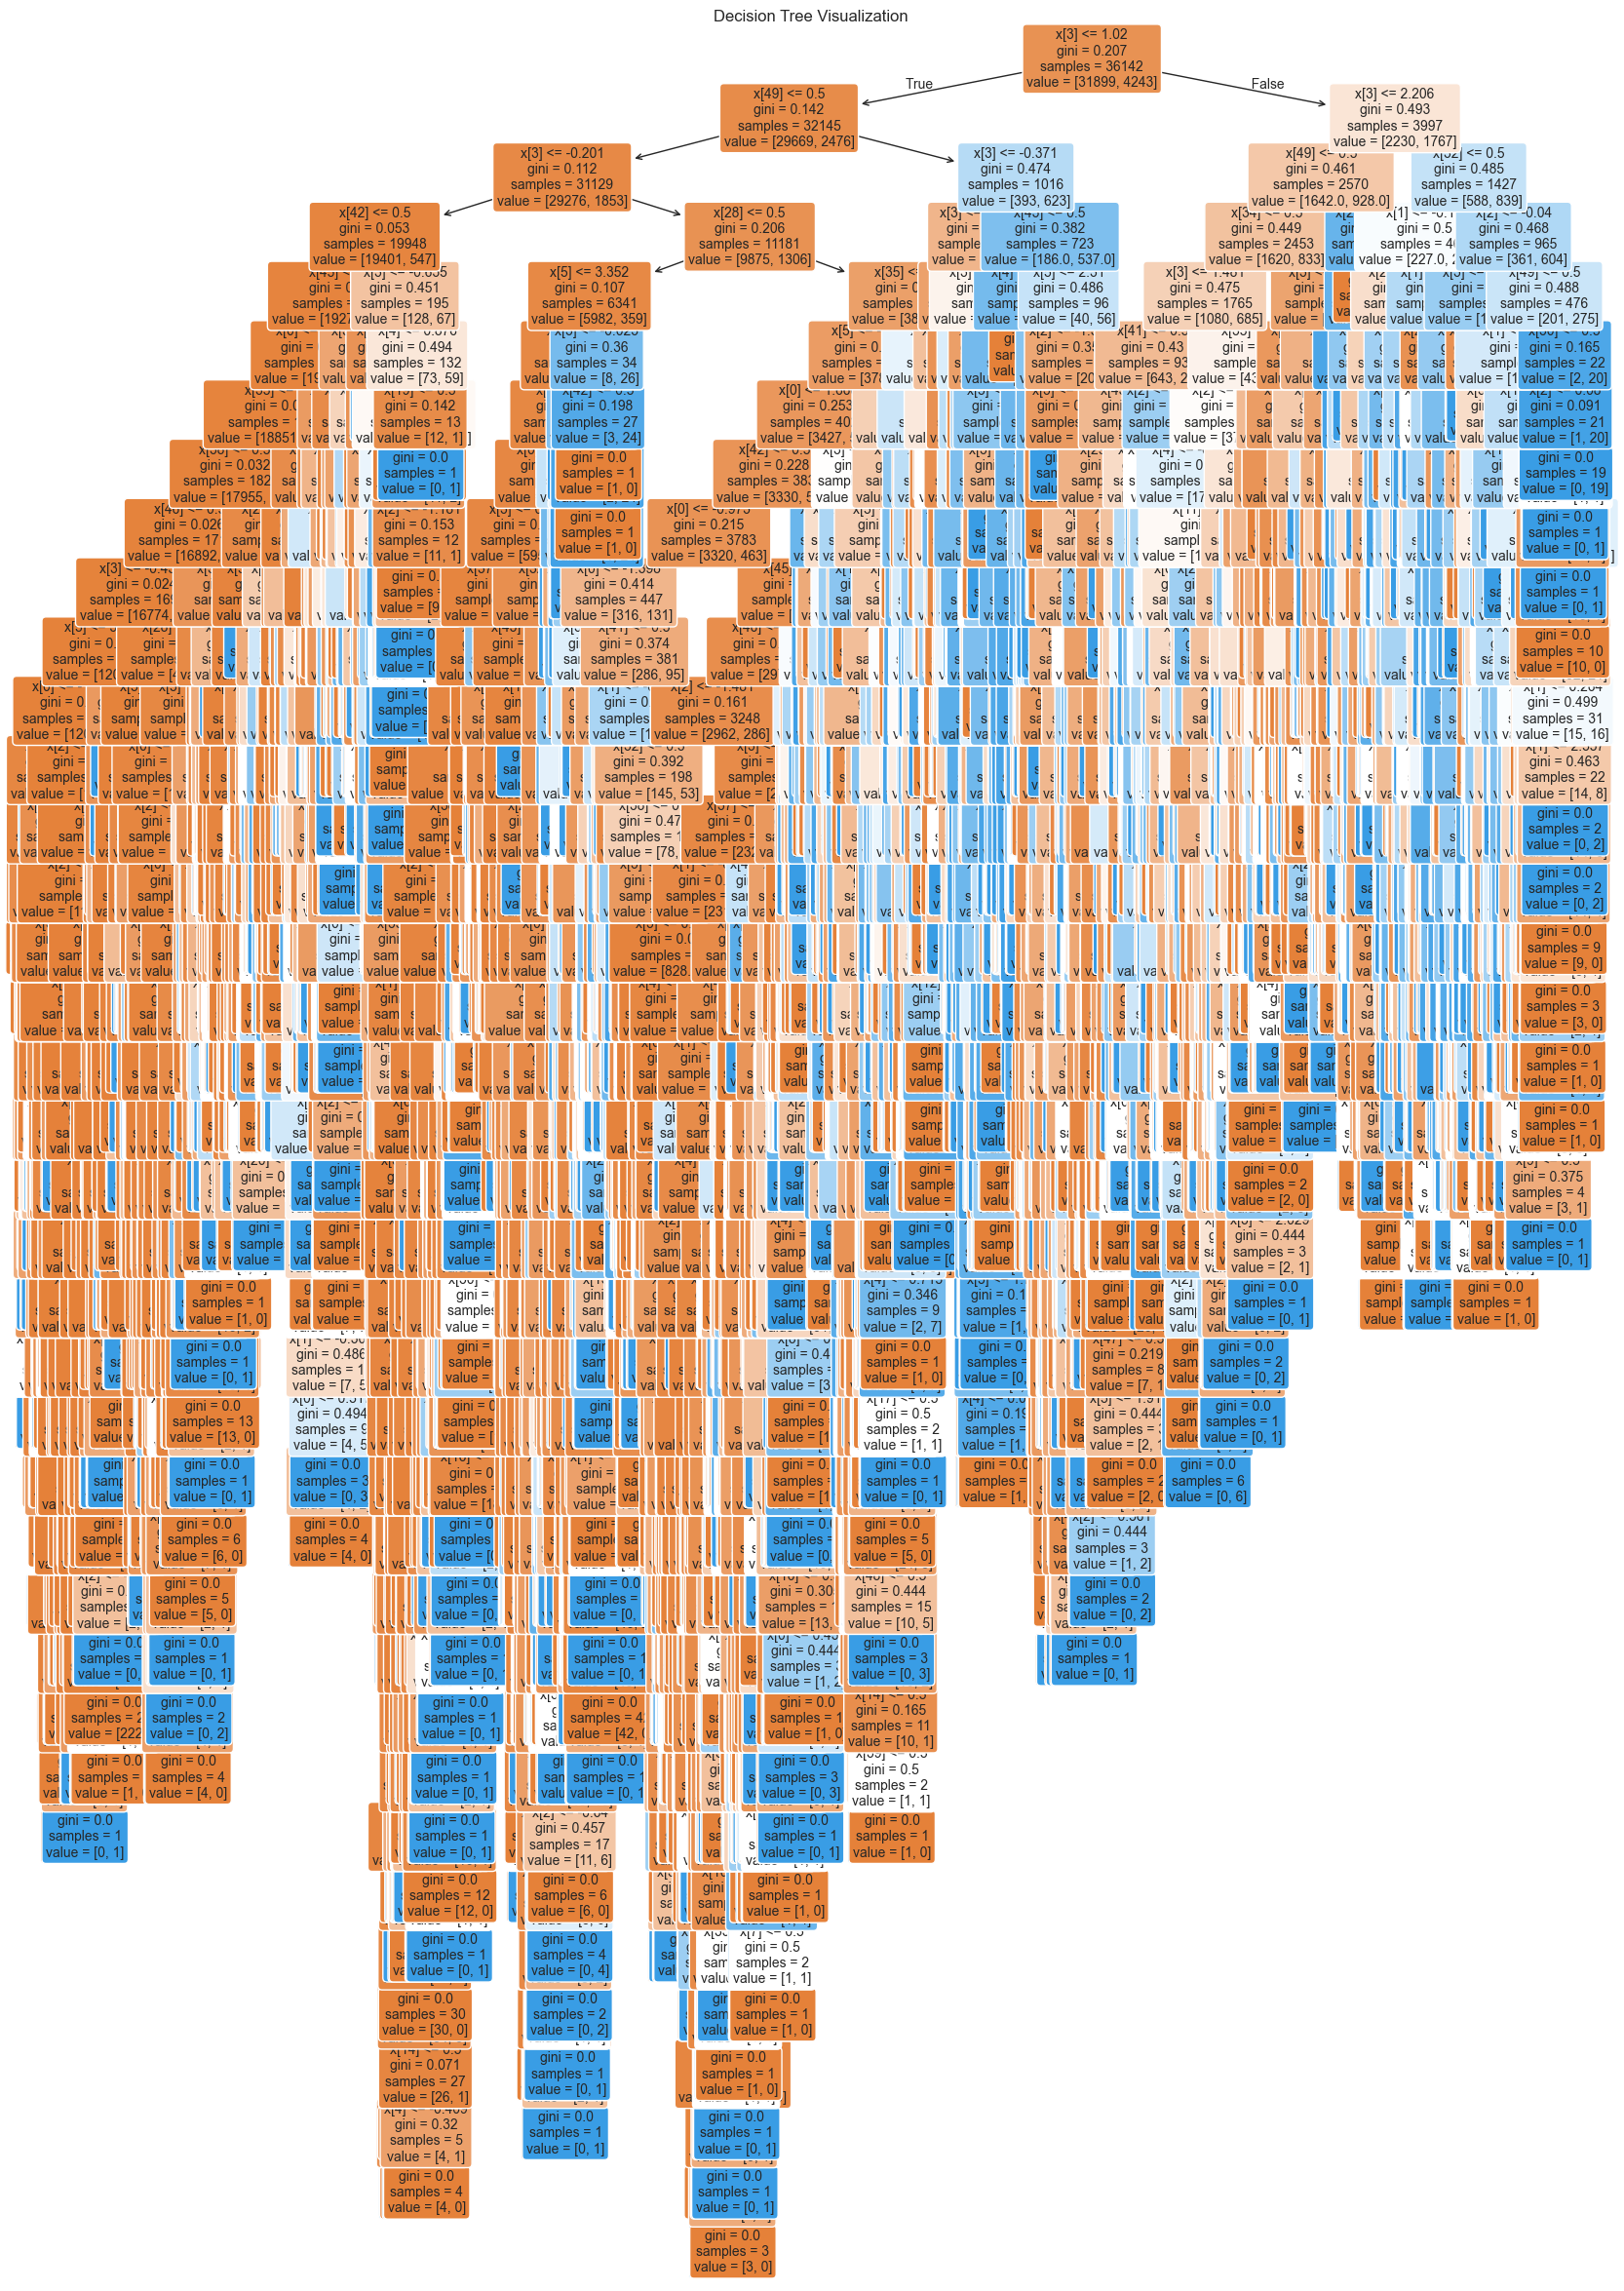

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7990
           1       0.45      0.48      0.46      1046

    accuracy                           0.87      9036
   macro avg       0.69      0.70      0.69      9036
weighted avg       0.87      0.87      0.87      9036

Confusion Matrix:
 [[7380  610]
 [ 549  497]]
Train Accuracy: 1.0
Test Accuracy: 0.8717352810978309
Precision: 0.44896115627822947
Recall: 0.4751434034416826
F1 Score: 0.46168137482582444
Confusion Matrix: [[7380  610]
 [ 549  497]]
Decision Tree Performance: {'Train Accuracy': 1.0, 'Test Accuracy': 0.8717352810978309, 'Precision': np.float64(0.44896115627822947), 'Recall': np.float64(0.4751434034416826), 'F1 Score': np.float64(0.46168137482582444), 'Confusion Matrix': array([[7380,  610],
       [ 549,  497]])}


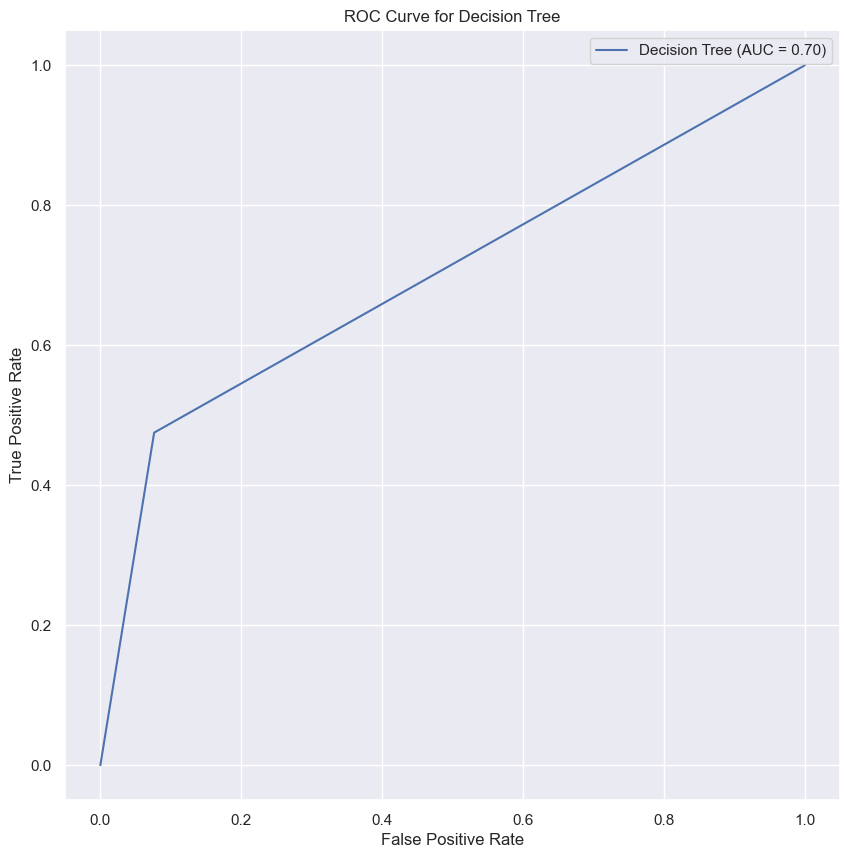

In [36]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the Decision Tree model and print metrics
def evaluate_decision_tree(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for Decision Tree
def plot_roc_curve_decision_tree(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Tree')
    plt.legend()
    plt.show()

# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Visualize the Decision Tree
plt.figure(figsize=(20, 30))
plot_tree(dtc.fit(X_train_preprocessed, y_train), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

# Evaluate Decision Tree model
dtc_metrics = evaluate_decision_tree(dtc, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("Decision Tree Performance:", dtc_metrics)

# Plot ROC curve for Decision Tree
plt.figure()
plot_roc_curve_decision_tree(dtc, X_test_preprocessed, y_test)


# 3. Random Forest Classifier

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7990
           1       0.66      0.43      0.52      1046

    accuracy                           0.91      9036
   macro avg       0.79      0.70      0.74      9036
weighted avg       0.90      0.91      0.90      9036

Confusion Matrix:
 [[7759  231]
 [ 596  450]]
Train Accuracy: 1.0
Test Accuracy: 0.9084772023019035
Precision: 0.6607929515418502
Recall: 0.43021032504780116
F1 Score: 0.5211349160393747
Confusion Matrix: [[7759  231]
 [ 596  450]]
Random Forest Performance: {'Train Accuracy': 1.0, 'Test Accuracy': 0.9084772023019035, 'Precision': np.float64(0.6607929515418502), 'Recall': np.float64(0.43021032504780116), 'F1 Score': np.float64(0.5211349160393747), 'Confusion Matrix': array([[7759,  231],
       [ 596,  450]])}


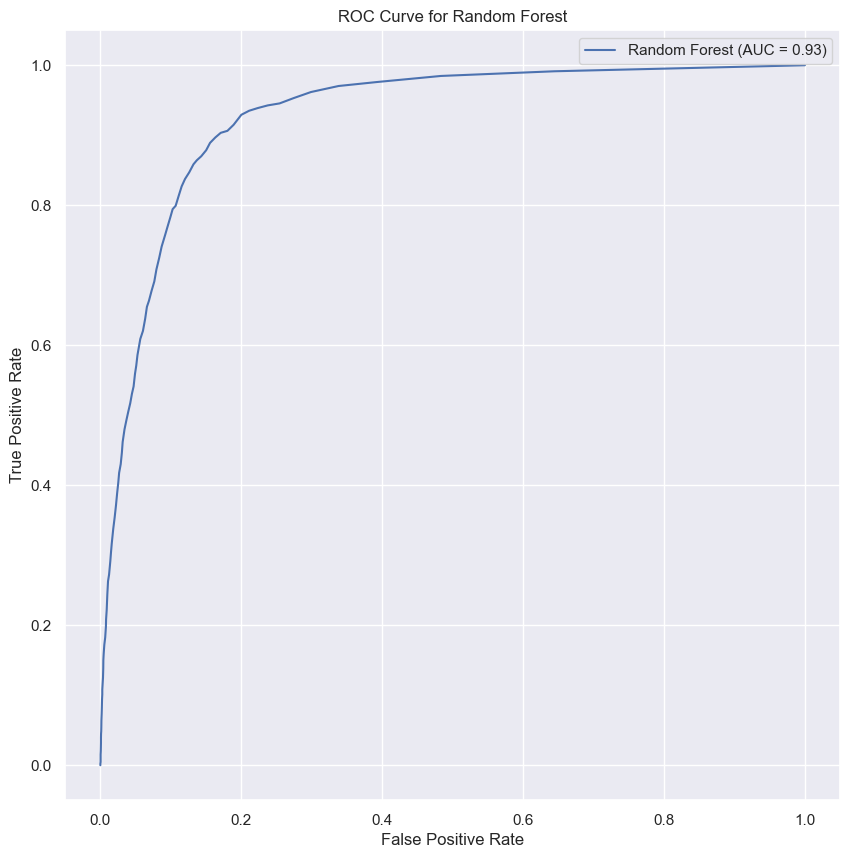

In [40]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the Random Forest model and print metrics
def evaluate_random_forest(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for Random Forest
def plot_roc_curve_random_forest(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend()
    plt.show()

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate Random Forest model
rfc_metrics = evaluate_random_forest(rfc, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("Random Forest Performance:", rfc_metrics)

# Plot ROC curve for Random Forest
plt.figure()
plot_roc_curve_random_forest(rfc, X_test_preprocessed, y_test)


## Hyperparameter Tuning (using RandomizedSearchCV )

In [44]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# 4.KNeighborsClassifier

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7990
           1       0.60      0.37      0.45      1046

    accuracy                           0.90      9036
   macro avg       0.76      0.67      0.70      9036
weighted avg       0.88      0.90      0.89      9036

Confusion Matrix:
 [[7735  255]
 [ 664  382]]
Train Accuracy: 0.9210613690443251
Test Accuracy: 0.8982957060646304
Precision: 0.5996860282574569
Recall: 0.3652007648183556
F1 Score: 0.45395127748068925
Confusion Matrix: [[7735  255]
 [ 664  382]]
KNN Performance: {'Train Accuracy': 0.9210613690443251, 'Test Accuracy': 0.8982957060646304, 'Precision': np.float64(0.5996860282574569), 'Recall': np.float64(0.3652007648183556), 'F1 Score': np.float64(0.45395127748068925), 'Confusion Matrix': array([[7735,  255],
       [ 664,  382]])}
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92   

NameError: name 'plot_roc_curve' is not defined

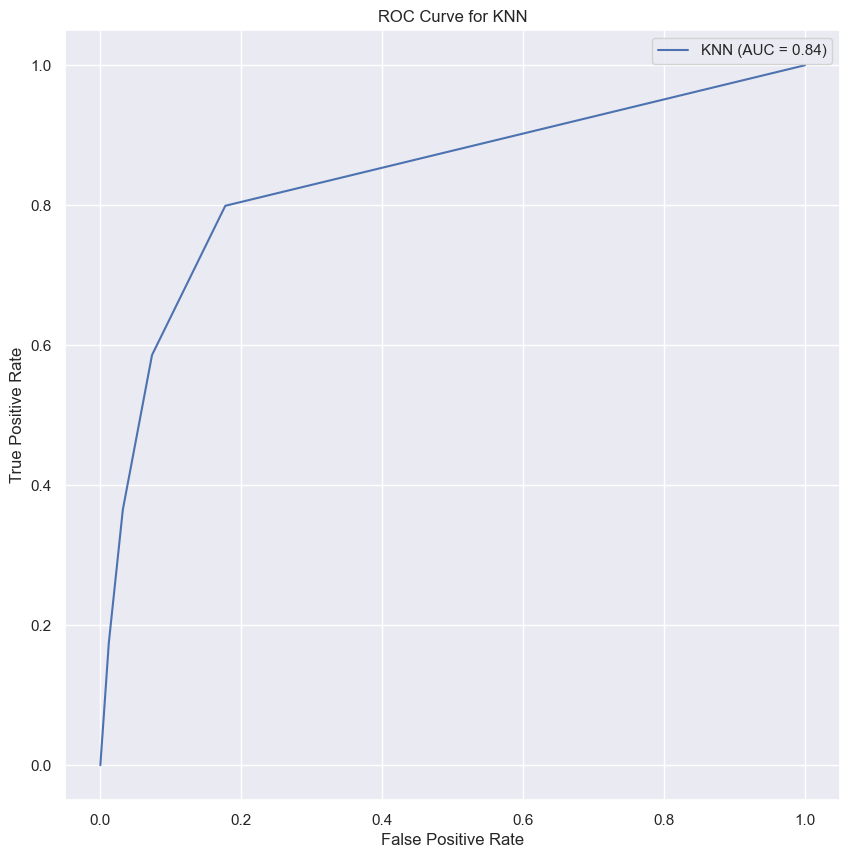

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the KNN model and print metrics
def evaluate_knn(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Print classification report
    print("KNN Classification Report:\n", classification_report(y_test, y_pred_test))
    
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    
    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='binary'),
        'Recall': recall_score(y_test, y_pred_test, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_test, average='binary'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }
    
    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    return metrics

# Define a function to plot ROC curve for KNN
def plot_roc_curve_knn(model, X_test, y_test, label):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend()

# Test-driven evaluation function for KNN
def test_knn_model_evaluation():
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Evaluate the model
    metrics = evaluate_knn(knn, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
    
    # Test expected values (based on assumptions)
    assert metrics['Train Accuracy'] > 0.7, "Train Accuracy should be greater than 70%"
    assert metrics['Test Accuracy'] > 0.7, "Test Accuracy should be greater than 70%"
    assert metrics['Precision'] > 0.5, "Precision should be greater than 50%"
    assert metrics['Recall'] > 0.1, "Recall should be greater than 10%"
    
    print("KNN model test passed!")
    return metrics

# 1. Instantiate KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train and evaluate KNN
knn_metrics = evaluate_knn(knn, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print("KNN Performance:", knn_metrics)

# 3. Test-driven evaluation of KNN model
test_knn_model_evaluation()

# 4. Plot ROC for KNN and compare with Decision Tree and Random Forest
plt.figure()
plot_roc_curve_knn(knn, X_test_preprocessed, y_test, 'KNN')
plot_roc_curve(dtc, X_test_preprocessed, y_test, 'Decision Tree')
plot_roc_curve(rfc, X_test_preprocessed, y_test, 'Random Forest')
plt.show()

# 5. Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(X_train_preprocessed, y_train)

# Display the best parameters found through Grid Search
print("Best parameters found for KNN:", grid_search_knn.best_params_)


# 4. Naive Bayes Model

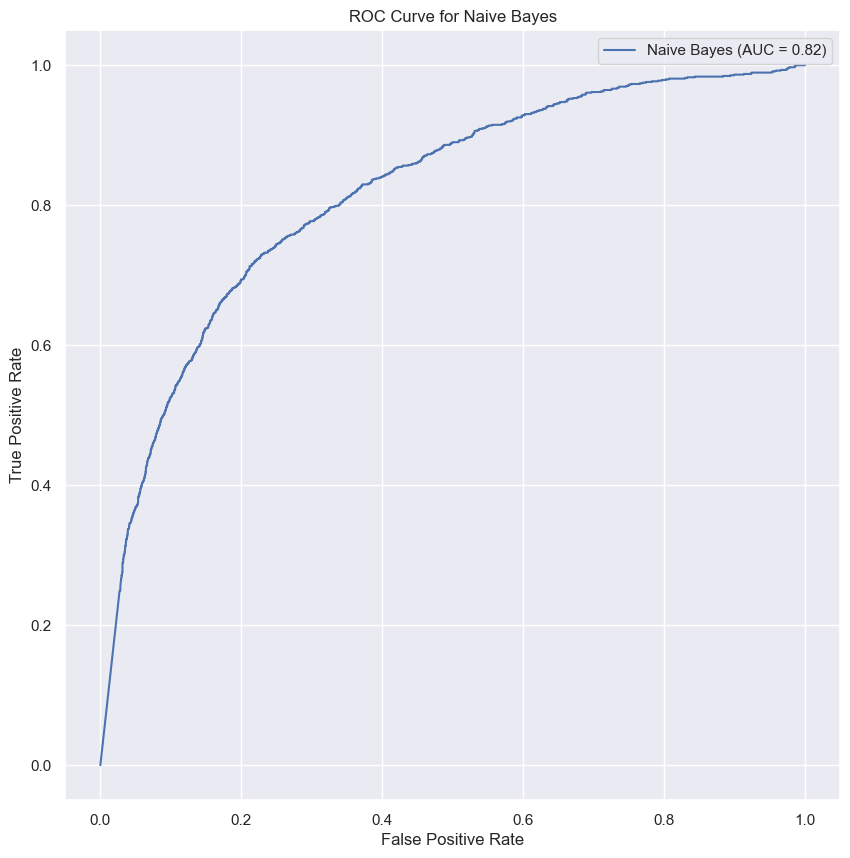

Accuracy: 0.86


In [38]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array if necessary
X_train_dense = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_dense = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_dense, y_train)

# Predict probabilities on the test set
y_pred_prob = nb_model.predict_proba(X_test_dense)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

# Print accuracy
y_pred = nb_model.predict(X_test_dense)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# 5. Logistic Regression

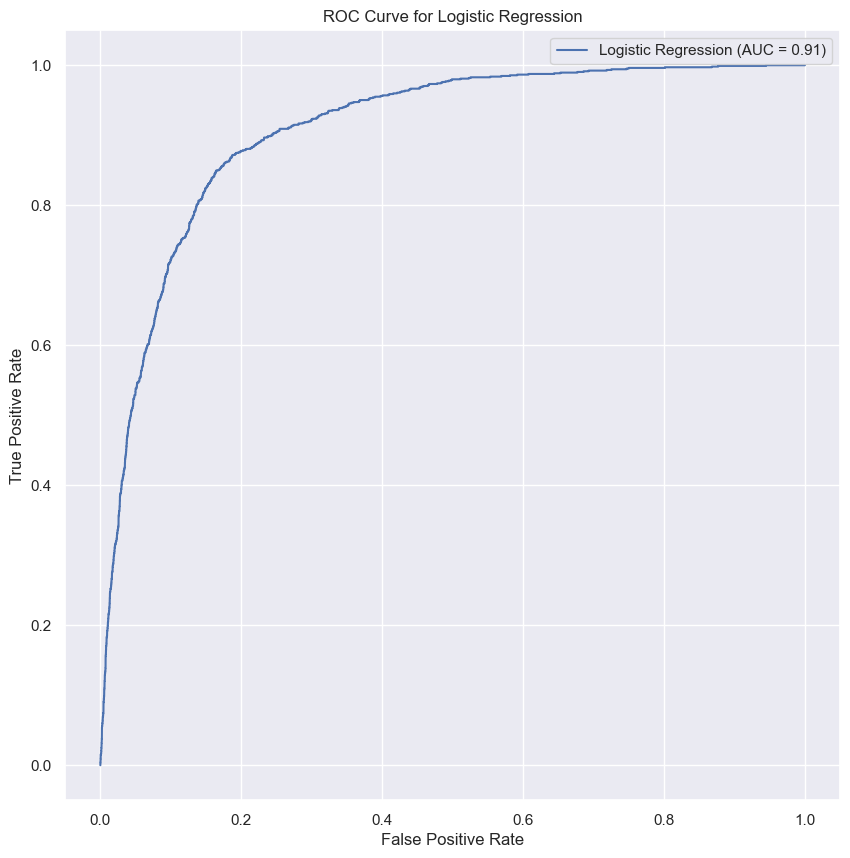

Accuracy: 0.90


In [39]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt



# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train_dense, y_train)

# Predict probabilities on the test set
y_pred_prob = log_reg.predict_proba(X_test_dense)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Print accuracy
y_pred = log_reg.predict(X_test_dense)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# 6. Stacking Classifier

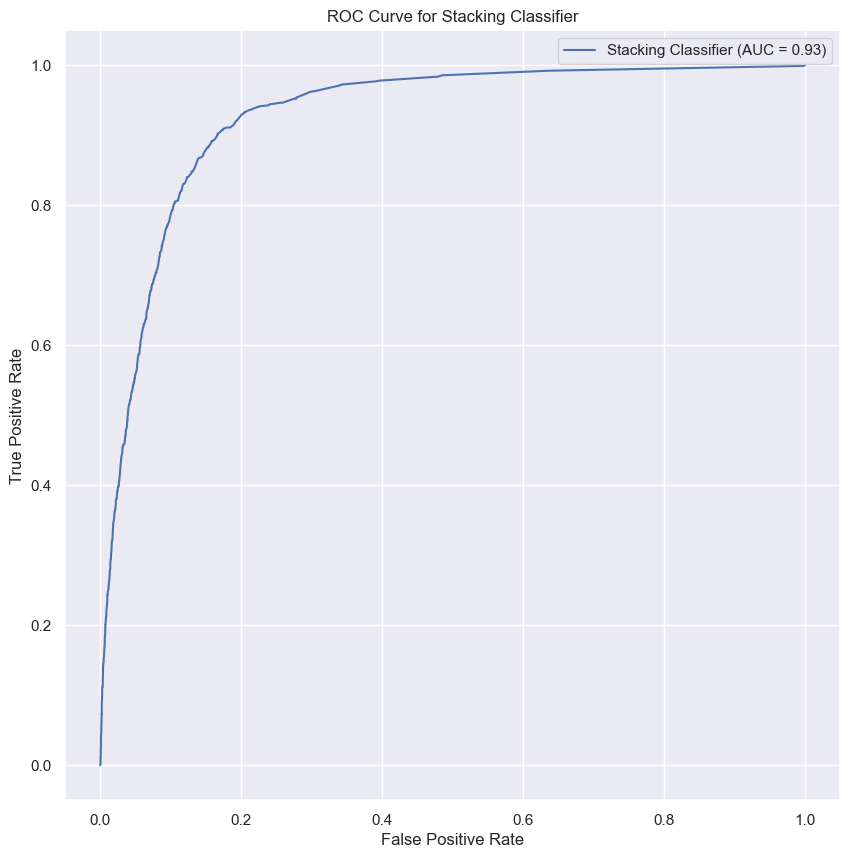

Accuracy: 0.91

Confusion Matrix:
[[7704  286]
 [ 553  493]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7990
           1       0.63      0.47      0.54      1046

    accuracy                           0.91      9036
   macro avg       0.78      0.72      0.74      9036
weighted avg       0.90      0.91      0.90      9036

F1 Score: 0.54
Precision: 0.63
Recall: 0.47


In [46]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Assume that dtc, knn, and rfc are already fitted models

# Initialize the meta-model (final classifier)
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier with pre-fitted models
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', dtc),
        ('knn', knn),
        ('random_forest', rfc)
    ],
    final_estimator=meta_model,
    cv=5  # Optional: You can specify cross-validation folds
)

# Fit the stacking classifier
# Even though the base models are fitted, the final estimator (meta-model) still needs fitting
stacking_clf.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = stacking_clf.predict_proba(X_test_preprocessed)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = stacking_clf.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


# 7. Gradient BoostingClassifier

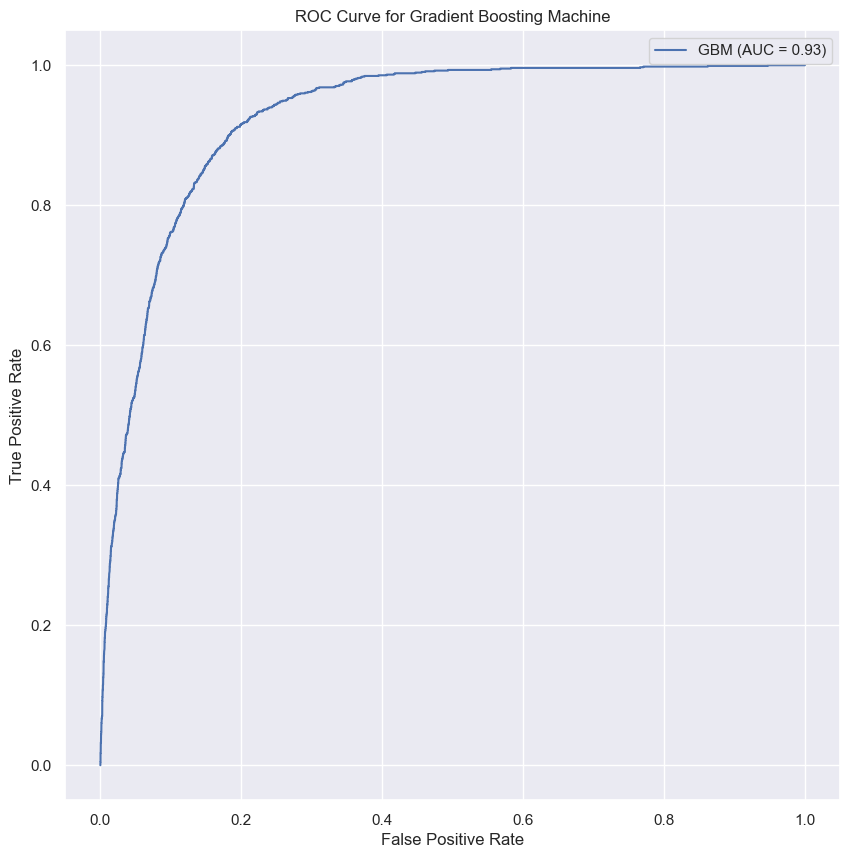

Accuracy: 0.91

Confusion Matrix:
[[7757  233]
 [ 603  443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7990
           1       0.66      0.42      0.51      1046

    accuracy                           0.91      9036
   macro avg       0.79      0.70      0.73      9036
weighted avg       0.90      0.91      0.90      9036

F1 Score: 0.51
Precision: 0.66
Recall: 0.42


In [47]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm.fit(X_train_preprocessed, y_train)

# Predict probabilities on the test set
y_pred_prob = gbm.predict_proba(X_test_preprocessed)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'GBM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Machine')
plt.legend()
plt.show()

# Predict labels on the test set
y_pred = gbm.predict(X_test_preprocessed)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


# 8. Ada Boost Classifier

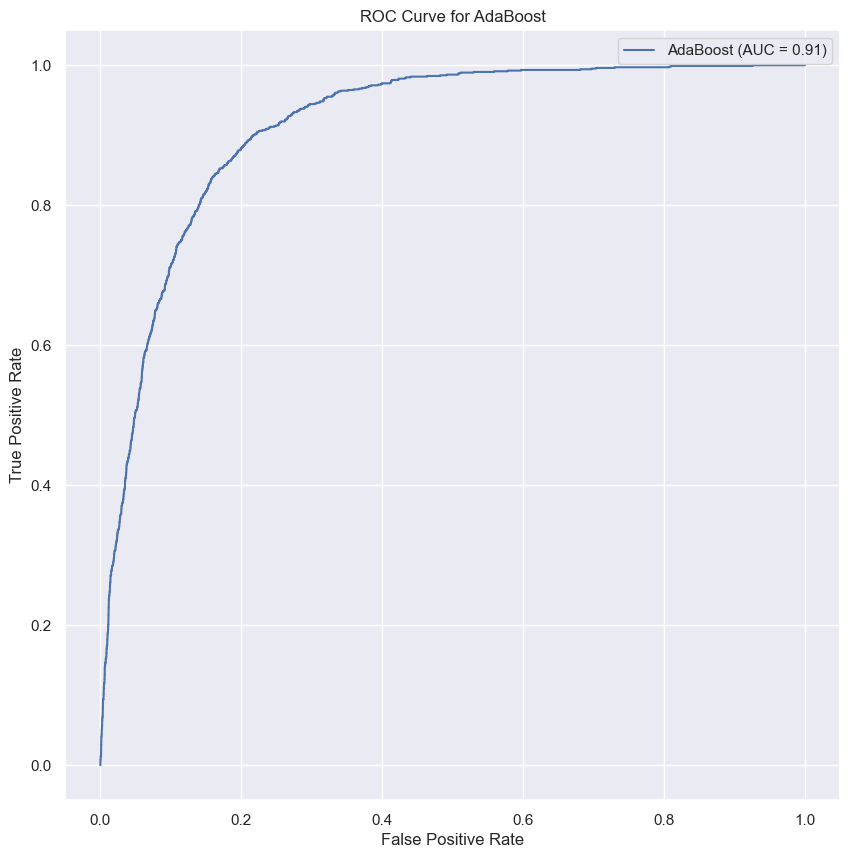

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      7990
           1       0.42      0.82      0.55      1046

    accuracy                           0.85      9036
   macro avg       0.70      0.83      0.73      9036
weighted avg       0.91      0.85      0.87      9036

Confusion Matrix:
 [[6793 1197]
 [ 189  857]]


In [48]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights (useful when class imbalance exists)
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize the AdaBoost classifier
adb = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model with sample weights
adb.fit(X_train_preprocessed, y_train, sample_weight=class_weights)

# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend()

# Create a new figure for the ROC curve
plt.figure()

# Plot ROC curve for AdaBoost model
plot_roc_curve(adb, X_test_preprocessed, y_test, 'AdaBoost')

# Display the plot
plt.show()

# Make predictions
y_pred = adb.predict(X_test_preprocessed)

# Print Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Summary of the Models

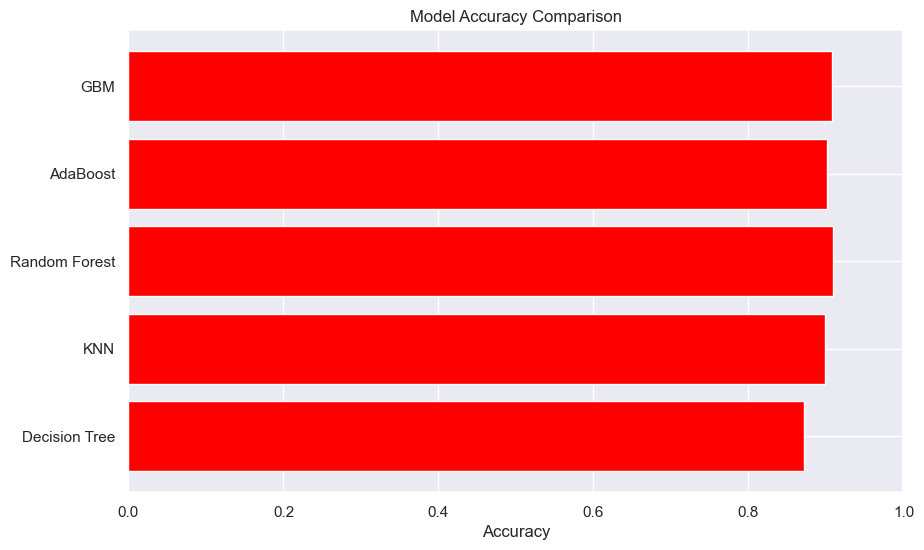

In [49]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Fit each model and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='red')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()


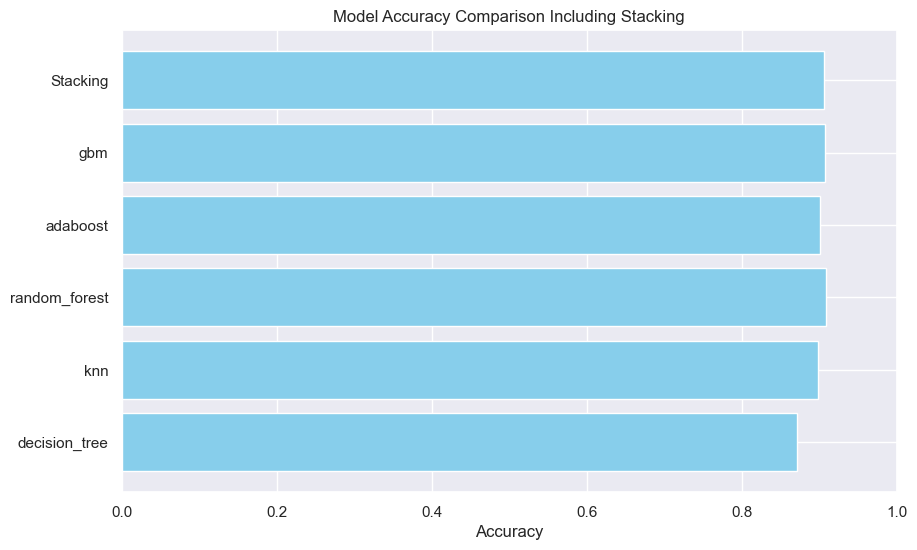

In [50]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Create a stacking classifier with a Logistic Regression meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Initialize a dictionary to store accuracy results
accuracy_results = {}

# Fit and evaluate base models
for name, model in base_models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Fit and evaluate the stacking model
stacking_model.fit(X_train_preprocessed, y_train)
y_pred_stacking = stacking_model.predict(X_test_preprocessed)
accuracy_results['Stacking'] = accuracy_score(y_test, y_pred_stacking)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison Including Stacking')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()

# Conclusion

Overall after running all type of models, Random Forest seems to be the best model fit for this use case !!